# Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from id3 import Id3Estimator, export_text, export_graphviz #Decision trees
import pydot
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

%matplotlib inline

C:\Users\Jorge\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Carga de los datos

In [2]:
bchBoston = datasets.load_boston()
dfBoston_features = pd.DataFrame(bchBoston.data, columns=bchBoston.feature_names)[['RM', 'LSTAT', 'PTRATIO']]
dfBoston_target = pd.DataFrame(bchBoston.target, columns=['MEDV'])
dfBoston = pd.concat([dfBoston_features, dfBoston_target], axis=1)

# Correlograma

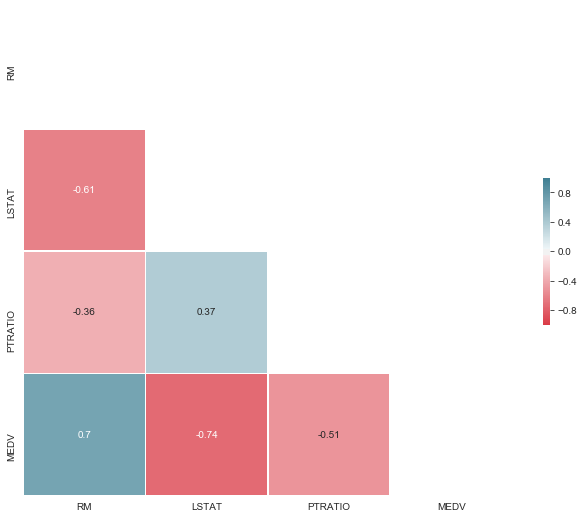

In [3]:
sns.set_style('whitegrid')
corr_matrix = dfBoston.corr().round(2)
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=0.6, cbar_kws={"shrink": 0.3}, annot=True)

# Pair plot

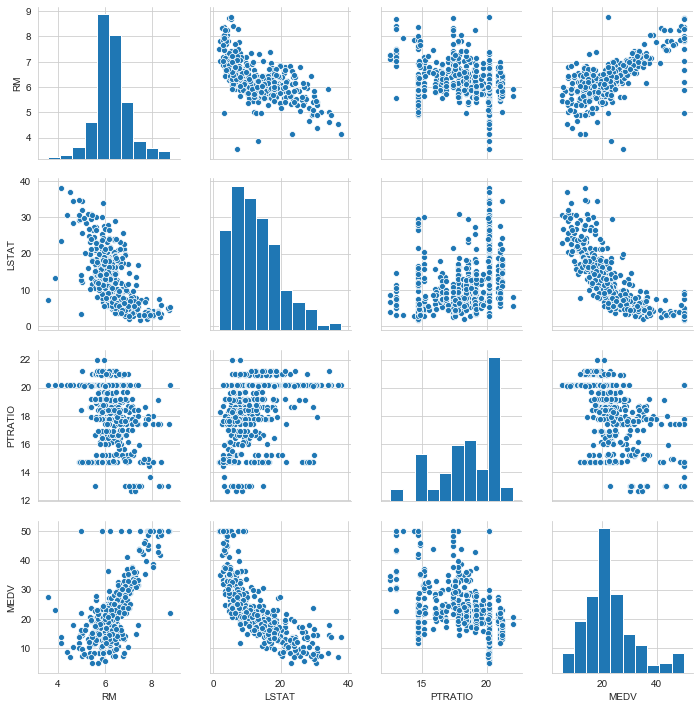

In [4]:
sns.pairplot(dfBoston)

# Train_test_split

In [5]:
X, y = dfBoston_features, dfBoston_target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
print("Training (%): {0: .2%}".format((X_train.shape[0])/(X_train.shape[0] + X_test.shape[0])))
print("Test (%): {0: .2%}".format((X_test.shape[0])/(X_train.shape[0] + X_test.shape[0])))

Training (%):  69.96%
Test (%):  30.04%


# Reg lineal simple

In [6]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)), end="\n\n")
print("lr.coef_:", (pd.DataFrame(np.hstack(lr.coef_), index=dfBoston_features.columns)), sep=" ", end="\n\n")
print("lr.intercept_:", lr.intercept_, sep=" ")

Training set score: 0.71
Test set score: 0.60

lr.coef_:                 0
RM       4.445125
LSTAT   -0.557608
PTRATIO -1.111656

lr.intercept_: [22.17686885]


# Ridge

In [7]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)), end="\n\n")
print("Ridge.coef_:", (pd.DataFrame(np.hstack(ridge.coef_), index=dfBoston_features.columns)), sep="\n", end="\n\n")
print("Ridge.intercept_:", ridge.intercept_, sep="\n")

Training set score: 0.71
Test set score: 0.60

Ridge.coef_:
                0
RM       4.402855
LSTAT   -0.560003
PTRATIO -1.113207

Ridge.intercept_:
[22.50196151]


# Lasso

In [8]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)), end="\n\n")
print("lasso.coef_:", (pd.DataFrame(np.hstack(lasso.coef_), index=dfBoston_features.columns)), sep=" ", end="\n\n")
print("lasso.intercept_:", lasso.intercept_, sep=" ")

Training set score: 0.67
Test set score: 0.57

lasso.coef_:                 0
RM       1.352472
LSTAT   -0.734378
PTRATIO -1.067192

lasso.intercept_: [43.06435531]


In [9]:
dfData = pd.read_excel('outdoor_game.xlsx')
dfData.head()

,Outlook,Temperature,Humidity,Wind,Play
0,overcast,hot,high,weak,yes
1,overcast,cool,normal,strong,yes
2,overcast,mild,high,strong,yes
3,overcast,hot,normal,weak,yes
4,rain,mild,high,weak,yes


In [10]:
feature_name = dfData.iloc[:,0:4].columns.values
feature_name

array(['Outlook', 'Temperature', 'Humidity', 'Wind'], dtype=object)

In [11]:
x_values = np.array(dfData.iloc[:,0:4].values, 'str')
x_values[0]

array(['overcast', 'hot', 'high', 'weak'], dtype='<U8')

In [12]:
y_values = np.array(dfData.iloc[:,4:5].values, 'str')
y_values[0]

array(['yes'], dtype='<U3')

In [13]:
clf = Id3Estimator()
clf.fit(x_values, y_values.ravel(), check_input=True)
print(export_text(clf.tree_, feature_name))


Outlook overcast: yes (4) 
Outlook rain
|   Wind strong: no (2) 
|   Wind weak: yes (3) 
Outlook sunny
|   Humidity high: no (3) 
|   Humidity normal: yes (2) 



C:\Users\Jorge\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


In [14]:
export_graphviz(clf.tree_,'tree.dot', feature_name)

<_io.TextIOWrapper name='tree.dot' mode='w' encoding='utf8'>

In [15]:
(graph, )=pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

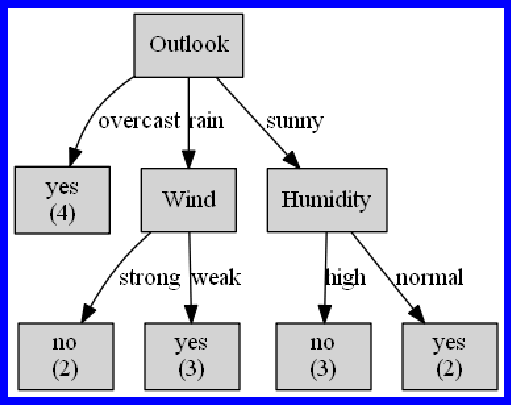

In [16]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='b', edgecolor="k")
img = mpimg.imread('tree.png')
plt.axis('off')
plt.imshow(img)